In [1]:
# Matplotlib - 2D plotting library
from matplotlib import pyplot as plt
from matplotlib import rcParams

# Show matplotlib figures inline the notebook
%matplotlib inline

# Pandas - High-performance data analysis
import pandas

# Glob - Unix style pathname pattern expansion
# Used to aggregate folders and files into a single list so they can be iterated over
import glob

# Numpy - For handling of large, multi-dimensional arrays and matrices
import numpy as np

# Scipy - For accurate integration
from scipy.integrate import simps
from scipy.integrate import trapz

##########################################################################################
# Setting rcParams for publication quality graphs
fig_width_pt = 246.0                    # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # Width in inches
fig_height = fig_width*golden_mean      # Height in inches
fig_size =  [fig_width, fig_height]
fig_size =  [7.3,4.2]
# fig_size =  [7.3*1.5,4.2*1.5]
# fig_size =  [7.3*2,4.2*2]
params = {'backend': 'pdf',
        'axes.labelsize': 10,
        'legend.fontsize': 9,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'xtick.major.size': 6,
        'xtick.major.width': 1,
        'xtick.minor.size': 2.5,
        'xtick.minor.width': 1,
        'ytick.major.size': 6,
        'ytick.major.width': 1,
        'ytick.minor.size': 2.5,
        'ytick.minor.width': 1,
        'font.family': 'times-new-roman',
        'font.sans-serif': 'Times New Roman',
        'font.size': 10,
        'text.usetex': True,
        'figure.figsize': fig_size}

# Update rcParams
rcParams.update(params)

In [2]:
##########################################################################################
# Energy of incident (input) particles
InputEnergies = np.array([np.linspace(100,900, num=9, endpoint=True, dtype = int),
                          np.linspace(1000,9000, num=9, endpoint=True, dtype = int),
                          np.linspace(10000,90000, num=9, endpoint=True, dtype = int),
                            ]).flatten()
for i in range(1,6):
    InputEnergies = np.insert(InputEnergies, [i+26], [100000*i])
    
DataFolder = '../G4AdEPTCubeSat_Results/Ar+CS2/Protons/'

##########################################################################################
# Energy thresholds (in eV) for events that will be included in the analysis
Thr_Gas = 100.
print InputEnergies

[   100    200    300    400    500    600    700    800    900   1000
   2000   3000   4000   5000   6000   7000   8000   9000  10000  20000
  30000  40000  50000  60000  70000  80000  90000 100000 200000 300000
 400000 500000]


In [3]:
##########################################################################################
# Load the simulation data for each input energy
Data = []

for InputEnergy in InputEnergies:
    # Create data file template from current energy 
    if InputEnergy <= 9000:
        DataFilename = 'proton_' + str(InputEnergy) + 'keV_Nr_100000000_ISO_nt_G4AdEPTCubeSat_t[0-7].csv'
    else:
        DataFilename = 'proton_' + str(InputEnergy) + 'keV_Nr_1000000_ISO_nt_G4AdEPTCubeSat_t[0-7].csv'
    # Statistics variables for each input energy data
    nPos = 0
    nElec = 0
    nSubPos = 0
    nSubElec = 0
    nTotal = 0
    nSubThr = 0
    nCompton = 0
    nPair = 0
    nPhoto = 0
    nTriton = 0
    
    # Print energy 
    print '\n------------------------------------------------------------'
    print 'Energy: \t\t', str(InputEnergy), 'keV'

    ##########################################################################################
    # Process the simulation data files
    # Column 0 - Total energy deposited in the sensitive gas volume [eV]
    # Column 1 - Energy deposited by positrons in the sensitive gas volume [eV]
    # Column 2 - Energy deposited by positrons in the sensitive gas volume [eV]
    # Column 3 - Energy deposited by tritons in the sensitive gas volume [eV]
    # Column 4 - Track length of particles in the sensitive gas volume [mm]
    # Column 5 - Number of secondary electrons generated in the sensitive gas volume
    # Column 6 - Number of secondary photons generated in the sensitive gas volume
    # Column 7 - Number of secondary positrons generated in the sensitive gas volume
    # Column 8 - Number of secondary tritons generated in the sensitive gas volume
    for dataFile in glob.glob(DataFolder + DataFilename):
        # Readout CSV files
        try:
            dataFrame = pandas.read_csv(dataFile, usecols=[0,1,2,3,4,5,6,7,8], comment="#", error_bad_lines=False, skip_blank_lines=True).values

            # Determine the interaction type
            for i in range(1,len(dataFrame)):
                if dataFrame[i,0] > Thr_Gas:
    #                 if dataFrame[i,8] > 0:
    #                     nTriton += 1
                    if dataFrame[i,7] > 0 and dataFrame[i,5] > 0:
                        nPair += 1
                    else:
                        if dataFrame[i,6] > 0. and dataFrame[i,5] > 0.:
                            nCompton += 1
                        else:
                            nPhoto += 1

            # Increment statistics
            nPos += dataFrame[(dataFrame[:,1] > Thr_Gas),0].size
            nElec += dataFrame[(dataFrame[:,2] > Thr_Gas),0].size
            nSubPos += dataFrame[(dataFrame[:,1] <= Thr_Gas),0].size
            nSubElec += dataFrame[(dataFrame[:,2] <= Thr_Gas),0].size
            nTotal += dataFrame[(dataFrame[:,0] > Thr_Gas),0].size
            nSubThr += dataFrame[(dataFrame[:,0] <= Thr_Gas),0].size
        except:
            pass
        
    # Add statistics to data list (Convert to numpy array later)
    Data.append([InputEnergy,nPos,nElec,nSubPos,nSubElec,nTotal,nSubThr,nCompton,nPair,nPhoto,nTriton])
        
    # Print statistics
    print '------------------------------------------------------------'
    print 'Number of events above threshold: \t', nTotal
    print 'Number of events below threshold: \t', nSubThr
    print 'Number of Pair Production events: \t', nPair
    print '------------------------------------------------------------'
    
# Convert statistics list to Numpy array
Data = np.asarray(Data)


------------------------------------------------------------
Energy: 		100 keV
------------------------------------------------------------
Number of events above threshold: 	0
Number of events below threshold: 	0
Number of Pair Production events: 	0
------------------------------------------------------------

------------------------------------------------------------
Energy: 		200 keV
------------------------------------------------------------
Number of events above threshold: 	0
Number of events below threshold: 	0
Number of Pair Production events: 	0
------------------------------------------------------------

------------------------------------------------------------
Energy: 		300 keV
------------------------------------------------------------
Number of events above threshold: 	0
Number of events below threshold: 	0
Number of Pair Production events: 	0
------------------------------------------------------------

------------------------------------------------------------

In [4]:
##########################################################################################
# Calculate the geometry factor (G) assuming an isotropic radiation environment.
# The detector is centered on, and encircled by, a spherical source of radius (R) and
# with N_R simulated particles distributed uniformly along the inner surface.

# Source information (Get this from the Geant4 simulation!!)
N_R = 100000000.
N_R_2 = 1000000.
R = 10.

# Calculate the geometry factors
G_Pair = Data[:,8]/N_R*4*(np.pi**2)*(R**2)


G_Total_1 = Data[:18,5]/N_R*4*(np.pi**2)*(R**2)
G_Total_2 = Data[18:,5]/N_R_2*4*(np.pi**2)*(R**2)
G_Total = np.array([])
G_Total = np.append(G_Total_1,G_Total_2)

# Calculate the errors for geometry factors 
err_G_Total = 4*(np.pi**2)*(R**2)*np.sqrt((1-Data[:,5]/N_R)*Data[:,5]/N_R**2)
err_G_Pair = 4*(np.pi**2)*(R**2)*np.sqrt((1-Data[:,8]/N_R)*Data[:,8]/N_R**2)

# Calculate relative errors for the geometry factors
relErr_G_Total = err_G_Total/G_Total
relErr_G_Pair = err_G_Pair/G_Pair

print G_Total

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   5.52697846e-04
   1.50017987e-03   3.90836334e-03   5.29010796e-03   8.68525187e-03
   1.41332735e-02   2.03708635e-02   1.97392088e-02   1.85548563e-01
   6.40197811e+02   9.35926690e+02   1.07783186e+03   1.22285188e+03
   1.26927850e+03   1.29216414e+03   1.30187978e+03   1.30972019e+03
   1.31826332e+03   1.31973587e+03   1.31739874e+03   1.32140185e+03]


Plot saved to: ../G4AdEPTCubeSat_Results/Ar+CS2/Protons/Geometric_Factor_Proton.pdf


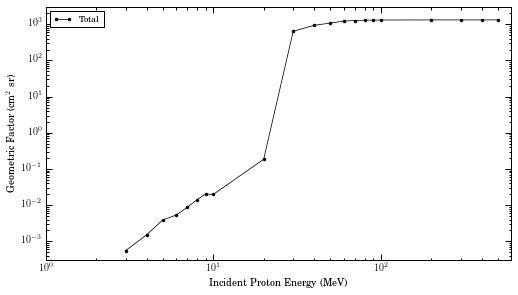

In [5]:
##########################################################################################
# Plot the Geometry Factor over a range of particle energies
figG, axG = plt.subplots(1,1)

plt.loglog(Data[:,0]/1000., G_Total, 'k.-', linewidth=0.75, label="Total")
# plt.loglog(Data[:,0]/1000., G_Pair, 'b.-', linewidth=0.75, label="Pair Production")
# plt.errorbar(Data[:,0]/1000., G_Total, xerr=0, yerr=err_G_Total, fmt='.')

# Figure Properties
axG.set_ylabel(r'Geometric Factor (cm$^2$ sr)')  
axG.set_xlabel('Incident Proton Energy (MeV)') 
axG.set_ylim(3e-4, 3e3)
axG.set_xlim(1, 600)

axG.legend(loc='upper left')

# Tight Layout
plt.tight_layout()

# Save the figure 
file_figG = 'Geometric_Factor_Proton.pdf'
plt.savefig(DataFolder + file_figG, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_figG)

# Show the figure

Plot saved to: ../G4AdEPTCubeSat_Results/Ar+CS2/Protons/Geometric_Factor_Error_Proton.pdf


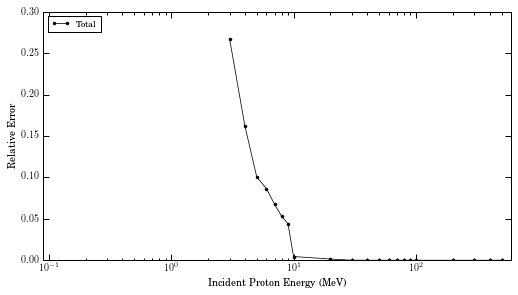

[             nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan   2.67261223e+01
   1.62221390e+01   1.00503732e+01   8.63867847e+00   6.74199121e+00
   5.28515477e+00   4.40224317e+00   4.47213584e-01   1.45864957e-01
   2.48124904e-03   2.05136784e-03   1.91122007e-03   1.79398695e-03
   1.76076796e-03   1.74505500e-03   1.73850986e-03   1.73328114e-03
   1.72763691e-03   1.72666957e-03   1.72820561e-03   1.72557710e-03]


In [6]:
##########################################################################################
# Plot the error in the Geometry Factor over a range of particle energies
figE, axE = plt.subplots(1,1)

# plt.plot(Data[:,0]/1000., relErr_G_Pair, 'b.:', linewidth=0.75, label="Pair Production")
plt.semilogx(Data[:,0]/1000., relErr_G_Total, 'k.-', linewidth=0.75, label="Total")

# Figure Properties
axE.set_ylabel(r'Relative Error')  
axE.set_xlabel('Incident Proton Energy (MeV)') 
# axE.set_ylim(0., 0.05)
axE.set_xlim(0.09, 600)

axE.legend(loc='upper left')

# Tight Layout
plt.tight_layout()

# Save the figure 
file_figE = 'Geometric_Factor_Error_Proton.pdf'
plt.savefig(DataFolder + file_figE, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_figE)

# Show the figure
plt.show(figE)
print relErr_G_Total*100.
# print relErr_G_Pair*100.

Plot saved to: ../G4AdEPTCubeSat_Results/Ar+CS2/Protons/Proton_Flux.pdf


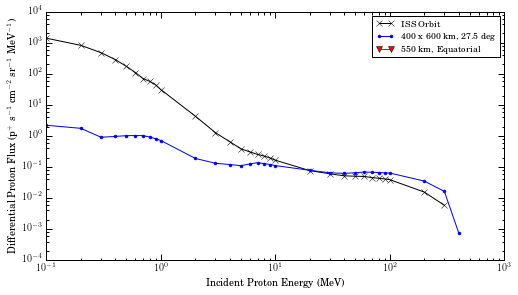

In [10]:
fluxData = []
fluxDataFile = '../G4AdEPTCubeSat_Results/Ar+CS2/Protons/Trapped_Proton_Flux.csv'
fluxDataFrame = pandas.read_csv(fluxDataFile, usecols=[1], comment='#',header=-1,dtype='float').values
fluxData = fluxDataFrame.flatten()

fluxData2 = []
fluxDataFile2 = '../G4AdEPTCubeSat_Results/Ar+CS2/Protons/Trapped_Proton_Flux_400x600.csv'
fluxDataFrame2 = pandas.read_csv(fluxDataFile2, usecols=[1], comment='#',header=-1,dtype='float').values
fluxData2 = fluxDataFrame2.flatten()

fluxData3 = []
fluxDataFile3 = '../G4AdEPTCubeSat_Results/Ar+CS2/Protons/Trapped_Proton_Flux_eq.csv'
fluxDataFrame3 = pandas.read_csv(fluxDataFile3, usecols=[1], comment='#',header=-1,dtype='float').values
fluxData3 = fluxDataFrame3.flatten()

figF, axF = plt.subplots(1,1)

plt.loglog(InputEnergies[:len(InputEnergies)-1]/1000.,fluxData,'kx-',label="ISS Orbit")
plt.loglog(InputEnergies[:len(InputEnergies)-1]/1000.,fluxData2,'b.-',label="400 x 600 km, 27.5 deg")
plt.loglog(InputEnergies[:len(InputEnergies)-1]/1000.,fluxData3,'rv-',label="550 km, Equatorial")

axF.set_ylabel(r'Differential Proton Flux (p$^{+}$ s$^{-1}$ cm$^{-2}$ sr$^{-1}$ MeV$^{-1}$)')
axF.set_xlabel('Incident Proton Energy (MeV)')
# axF.set_ylim(1e-2, 1e6)
plt.tight_layout()

axF.legend(loc='upper right')

# Save the figure 
file_figF = 'Proton_Flux.pdf'
plt.savefig(DataFolder + file_figF, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_figF)

plt.show(figF)

Plot saved to: ../G4AdEPTCubeSat_Results/Ar+CS2/Protons/Proton_Differential_Count_Rate.pdf


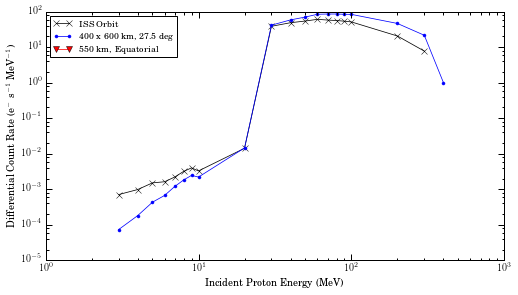

In [9]:
diffCountRate1 = G_Total[:len(G_Total)-1]*fluxData
diffCountRate2 = G_Total[:len(G_Total)-1]*fluxData2
diffCountRate3 = G_Total[:len(G_Total)-1]*fluxData3
# diffCountRate_Pair = G_Pair*fluxData
figD, axD = plt.subplots(1,1)

plt.loglog(InputEnergies[:len(InputEnergies)-1]/1000.,diffCountRate1,'kx-',linewidth=0.75,label='ISS Orbit')
plt.loglog(InputEnergies[:len(InputEnergies)-1]/1000.,diffCountRate2,'b.-',linewidth=0.75,label='400 x 600 km, 27.5 deg')
plt.loglog(InputEnergies[:len(InputEnergies)-1]/1000.,diffCountRate3,'rv-',linewidth=0.75,label='550 km, Equatorial')
# plt.loglog(InputEnergies/1000.,diffCountRate_Pair,'b.-',linewidth=0.75,label='Pair Production')

axD.set_ylabel(r'Differential Count Rate (e$^{-}$ s$^{-1}$ MeV$^{-1}$)')
axD.set_xlabel('Incident Proton Energy (MeV)')

axD.set_xlim(1e0, 1e3)

axD.legend(loc='upper left')

plt.tight_layout()

file_figD = 'Proton_Differential_Count_Rate.pdf'
plt.savefig(DataFolder + file_figD, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_figD)

plt.show(figD)

In [17]:
##########################################################################################
### False Positive Counts

# intCountRate_trial = simps(diffCountRate_Pair1) 

# # Simpson's Method
# Energies_MeV = InputEnergies/1000.
# intFalseRate1 = np.array([])
# intFalseRate2 = np.array([])
# intFalseRate3 = np.array([])

# Counts = 0
# for i in range(0,len(InputEnergies)-1):    # Modified Simpson's rule with variable energy spacing
#     dE = Energies_MeV[i+1]-Energies_MeV[i]
#     Counts = trapz(diffCountRate_Pair1[i:i+2],dx=dE)# Energies_MeV[i:i+2])# # Using dE or Energies_MeV gives the same answer
#     intFalseRate1 = np.append(intFalseRate1,Counts)

# Counts = 0
# for i in range(0,len(InputEnergies)-1):    # Modified Simpson's rule with variable energy spacing
#     dE = Energies_MeV[i+1]-Energies_MeV[i]
#     Counts = trapz(diffCountRate_Pair2[i:i+2],dx=dE)# Energies_MeV[i:i+2])# # Using dE or Energies_MeV gives the same answer
#     intFalseRate2 = np.append(intFalseRate2,Counts)

# Counts = 0
# for i in range(0,len(InputEnergies)-1):    # Modified Simpson's rule with variable energy spacing
#     dE = Energies_MeV[i+1]-Energies_MeV[i]
#     Counts = trapz(diffCountRate_Pair3[i:i+2],dx=dE)# Energies_MeV[i:i+2])# # Using dE or Energies_MeV gives the same answer
#     intFalseRate3 = np.append(intFalseRate3,Counts)
    
# intFalseRate1 = sum(intFalseRate1)
# intFalseRate2 = sum(intFalseRate2)
# intFalseRate3 = sum(intFalseRate3)

# ##########################################################################################
# # Average Energy Method
def effEnergy(Energy1,Energy2):
    effEnergy1 = np.log(Energy2/Energy1)/(1./Energy1-1./Energy2)
    effEnergy2 = 1./((effEnergy1**2)*(1./Energy1-1./Energy2))
    return effEnergy1,effEnergy2    # effEnergy1 = 1./(<E>^2 * (1/E1 - 1/E2)

inEnergy1 = 1.*Energies_MeV[0:len(Energies_MeV)-1]
inEnergy2 = 1.*Energies_MeV[1:len(Energies_MeV)]

[effecEnergy1,effecEnergy2] = effEnergy(inEnergy1,inEnergy2)    # <E>

# diffFalseRate_1 = diffCountRate_Pair1[0:15]/effecEnergy2
# diffFalseRate_2 = diffCountRate_Pair2[0:15]/effecEnergy2
# diffFalseRate_3 = diffCountRate_Pair3[0:15]/effecEnergy2

# revDiffFalseRate_1 = diffFalseRate_1[::-1]
# revDiffFalseRate_2 = diffFalseRate_2[::-1]
# revDiffFalseRate_3 = diffFalseRate_3[::-1]

# intFalseRate_1 = np.array([])
# intFalseRate_2 = np.array([])
# intFalseRate_3 = np.array([])

# counts = 0
# for i in range(0,len(diffFalseRate_1)):
#     counts = sum(revDiffFalseRate_1[0:i])
#     intFalseRate_1 = np.append(intFalseRate_1, counts)
    
# counts = 0
# for i in range(0,len(diffFalseRate_2)):
#     counts = sum(revDiffFalseRate_2[0:i])
#     intFalseRate_2 = np.append(intFalseRate_2, counts)
    
# counts = 0
# for i in range(0,len(diffFalseRate_3)):
#     counts = sum(revDiffFalseRate_3[0:i])
#     intFalseRate_3 = np.append(intFalseRate_3, counts)
    
# intFalseRate_1 = intFalseRate_1[::-1]
# intFalseRate_2 = intFalseRate_2[::-1]
# intFalseRate_3 = intFalseRate_3[::-1]

##########################################################################################
##########################################################################################
### Proton Counts
# Simpson's method
intCountRate1 = np.array([])
intCountRate2 = np.array([])
intCountRate3 = np.array([])

Counts = 0
for i in range(0,len(InputEnergies)-1):    # Modified Simpson's rule with variable energy spacing
    dE = Energies_MeV[i+1]-Energies_MeV[i]
    Counts = trapz(diffCountRate1[i:i+2],dx=dE)# Energies_MeV[i:i+2])# # Using dE or Energies_MeV gives the same answer
    intCountRate1 = np.append(intCountRate1,Counts)

Counts = 0
for i in range(0,len(InputEnergies)-1):    # Modified Simpson's rule with variable energy spacing
    dE = Energies_MeV[i+1]-Energies_MeV[i]
    Counts = trapz(diffCountRate2[i:i+2],dx=dE)# Energies_MeV[i:i+2])# # Using dE or Energies_MeV gives the same answer
    intCountRate2 = np.append(intCountRate2,Counts)

Counts = 0
for i in range(0,len(InputEnergies)-1):    # Modified Simpson's rule with variable energy spacing
    dE = Energies_MeV[i+1]-Energies_MeV[i]
    Counts = trapz(diffCountRate3[i:i+2],dx=dE)# Energies_MeV[i:i+2])# # Using dE or Energies_MeV gives the same answer
    intCountRate3 = np.append(intCountRate3,Counts)

intCountRate1_Simp = sum(intCountRate1)
intCountRate2_Simp = sum(intCountRate2)
intCountRate3_Simp = sum(intCountRate3)

##########################################################################################
# Average Energy Method
diffCountRate_1 = diffCountRate1[0:31]/effecEnergy2
diffCountRate_2 = diffCountRate2[0:31]/effecEnergy2
diffCountRate_3 = diffCountRate3[0:31]/effecEnergy2

revDiffCountRate_1 = diffCountRate_1[::-1]
revDiffCountRate_2 = diffCountRate_2[::-1]
revDiffCountRate_3 = diffCountRate_3[::-1]

intCountRate_1 = np.array([])
intCountRate_2 = np.array([])
intCountRate_3 = np.array([])

counts = 0
for i in range(0,len(diffCountRate_1)):
    counts = sum(revDiffCountRate_1[0:i])
    intCountRate_1 = np.append(intCountRate_1, counts)
    
counts = 0
for i in range(0,len(diffCountRate_2)):
    counts = sum(revDiffCountRate_2[0:i])
    intCountRate_2 = np.append(intCountRate_2, counts)
    
counts = 0
for i in range(0,len(diffCountRate_3)):
    counts = sum(revDiffCountRate_3[0:i])
    intCountRate_3 = np.append(intCountRate_3, counts)
    
intCountRate_1 = intCountRate_1[::-1]
intCountRate_2 = intCountRate_2[::-1]
intCountRate_3 = intCountRate_3[::-1]

# ##########################################################################################
# # Calculate the count rate error from Simpson's Method
# low_G_Pair = G_Pair - err_G_Pair
# high_G_Pair = G_Pair + err_G_Pair
# diffCountRateErrorLow = low_G_Pair*fluxData
# diffCountRateErrorHigh = high_G_Pair*fluxData

# # Lowest possible counts
# Counts = 0
# dE = 0
# intCountRateErrorLow = np.array([])

# for i in range(0,len(InputEnergies)-1):    # Modified Simpson's rule with variable energy spacing
#     dE = Energies_MeV[i+1]-Energies_MeV[i]
#     Counts = trapz(diffCountRateErrorLow[i:i+2],dx=dE)# Energies_MeV[i:i+2])# # Using dE or Energies_MeV gives the same answer
#     intCountRateErrorLow = np.append(intCountRateErrorLow,Counts)

# intCountRateErrorLow = sum(intCountRateErrorLow)    
    
# # Highest possible counts
# Counts = 0
# dE = 0
# intCountRateErrorHigh = np.array([])

# for i in range(0,len(InputEnergies)-1):    # Modified Simpson's rule with variable energy spacing
#     dE = Energies_MeV[i+1]-Energies_MeV[i]
#     Counts = trapz(diffCountRateErrorHigh[i:i+2],dx=dE)# Energies_MeV[i:i+2])# # Using dE or Energies_MeV gives the same answer
#     intCountRateErrorHigh = np.append(intCountRateErrorHigh,Counts)
    
# intCountRateErrorHigh = sum(intCountRateErrorHigh)

# intCountRateError = (intCountRateErrorHigh-intCountRateErrorLow)/2

# ##########################################################################################
# # Calculate the count rate error from Average Energy Method

# counts = 0
# inEnergy1 = 1.*Energies_MeV[0:len(Energies_MeV)-1]
# inEnergy2 = 1.*Energies_MeV[1:len(Energies_MeV)]

# [effecEnergy1,effecEnergy2] = effEnergy(inEnergy1,inEnergy2)    # <E>

# # Lowest possible count rate
# diffCountRateErrorAvgLow = diffCountRateErrorLow[0:15]/effecEnergy2
# revDiffCountRateErrorAvgLow = diffCountRateErrorAvgLow[::-1]
# intCountRateErrorAvgLow = np.array([])

# for i in range(0,len(diffCountRate)):
#     counts = sum(revDiffCountRateErrorAvgLow[0:i])
#     intCountRateErrorAvgLow = np.append(intCountRateErrorAvgLow, counts)
    
# intCountRateErrorAvgLow = intCountRateErrorAvgLow[::-1]

# # Highest Possible count rate
# diffCountRateErrorAvgHigh = diffCountRateErrorHigh[0:15]/effecEnergy2
# revDiffCountRateErrorAvgHigh = diffCountRateErrorAvgHigh[::-1]
# intCountRateErrorAvgHigh = np.array([])

# for i in range(0,len(diffCountRate)):
#     counts = sum(revDiffCountRateErrorAvgHigh[0:i])
#     intCountRateErrorAvgHigh = np.append(intCountRateErrorAvgHigh, counts)
    
# intCountRateErrorAvgHigh = intCountRateErrorAvgHigh[::-1]


# intCountRateErrorAvg = (max(intCountRateErrorAvgHigh)-max(intCountRateErrorAvgLow))/2

# print intCountRate*60*92.6318
# print intCountRate_trial*60*92.6318
# print intCountRate1*60*92.6318
# print "Predicted count rate of", max(intCountRate_Pair1)*60*92.6318, "+/- ", intCountRateErrorAvg*60*92.6318, "false positives/orbit by Average Energy Method."
# print "Predicted count rate of", intFalseRate1*60*92.6318," +/- ", intCountRateError*60*92.6318, "false positives/orbit by Modified Simpson's Rule."
# print "Predicted count rate of", max(intCountRate_Pair1)*60*60*24*365," +/- ", intCountRateErrorAvg*60*60*24*365, "false positives/year by Average Energy Method."
# print "Predicted count rate of", intFalseRate1*60*60*24*365," +/- ", intCountRateError*60*60*24*365, "false positives/year by Modified Simpson's Rule."

print "In ISS orbit: \t\t\t", max(intCountRate_1)*60*92.6318, " detections/orbit and "#, max(intFalseRate_1)*60*92.6318, " false positives per orbit" 
print "In 400x600 km, 27.5 deg orbit: \t", max(intCountRate_2)*60*94., " detections/orbit and "#, max(intFalseRate_2)*60*92.6318, " false positives per orbit" 
print "In 550 km, 0 deg orbit: \t", max(intCountRate_3)*60*95, " detections/orbit and "#, max(intFalseRate_3)*60*92.6318, " false positives per orbit" 

 In ISS orbit: 			63553952.4751  detections/orbit and 
In 400x600 km, 27.5 deg orbit: 	111069260.387  detections/orbit and 
In 550 km, 0 deg orbit: 	0.0  detections/orbit and 
